## 03 OTU ratio

This notebook illustrates how the beneficial/non-beneficial bug ratio was calculated as shown in [Figure 2E](assets/Figure_2E.tif).
***

### 3.1 Clean environment. Load libraries.

In [1]:
rm(list = ls())

##-- load libs
suppressMessages(library(ggplot2))
suppressMessages(library(reshape2))

### 3.2 Import data files.

In [2]:
##-- data files
sample.file = '../data/human_16S.sampleinfo.csv'
otu.file = '../data/human_16S.even13190.rel.sig.csv'
stats.file = '../data/human_16S.even13190.stats.sig.csv'

##-- import data 
sample = read.csv(sample.file, row.names = 1)
otu = read.csv(otu.file, row.names = 1)
stats = read.csv(stats.file, row.names = 1)

print(nrow(stats))

[1] 63


### 3.3 Select 16S bugs confirmed by shotgun sequencing (n=43). Split into bugs that are potentially beneficial (UP in R, n=28) and non-beneficial (UP in NR, n=15). 

In [3]:
##-- filter for 43 bugs confirmed by shotgun
stats = subset(stats, Confirmed.by.shotgun.sequencing=='Yes')
row.names(otu) = gsub('[|]\\S*$','',row.names(otu))
otu = otu[row.names(otu) %in% row.names(stats),]
print(dim(otu)) ## 43 bugs, 42 samples

##-- record good and bad bug lists
good.bugs = row.names(subset(stats, Non.parametric.T.test.statistic<0))
bad.bugs = row.names(subset(stats, Non.parametric.T.test.statistic>0))
print(length(good.bugs)) ## 28
print(length(bad.bugs)) ## 15

[1] 43 42
[1] 28
[1] 15


### 3.4 Calculate beneficial to non-beneficial bug ratio, counting only the presence and absence of a bug in a sample.

In [4]:
otu.t = data.frame(t(otu), check.names=FALSE)

bug.ratio = data.frame(bug.ratio = 
                         apply(otu.t[,good.bugs], 1, function(x) sum(x>0, na.rm=T)) / 
                         apply(otu.t[,bad.bugs], 1, function(x) sum(x>0, na.rm=T)))

bug.ratio = merge(sample, bug.ratio, by = 'row.names')
colnames(bug.ratio)[1] = 'Sample'

print(bug.ratio)

   Sample     Response                BORR RECIST. bug.ratio
1     P01 NonResponder      Stable Disease     -11 1.2222222
2     P02    Responder    Partial Response     -65 3.0000000
3     P03 NonResponder Progressive Disease      38 0.5000000
4     P04 NonResponder      Stable Disease      -7 0.8750000
5     P05 NonResponder Progressive Disease      58 0.6666667
6     P06 NonResponder      Stable Disease      27 0.3333333
7     P07    Responder    Partial Response     -60 3.0000000
8     P08 NonResponder Progressive Disease      65 1.1250000
9     P09    Responder    Partial Response     -51 4.7500000
10    P10 NonResponder Progressive Disease     357 0.1666667
11    P11 NonResponder      Stable Disease     -28 0.3750000
12    P12 NonResponder      Stable Disease      -9 1.2000000
13    P13    Responder    Partial Response     -34 3.0000000
14    P14 NonResponder      Stable Disease      29 1.1250000
15    P15 NonResponder Progressive Disease      69 0.8571429
16    P16    Responder  

### 3.5 Draw ratio of beneficial to non-beneficial OTU numbers for each patient vs. the patient’s RECIST aggregate tumor measurement change in %.

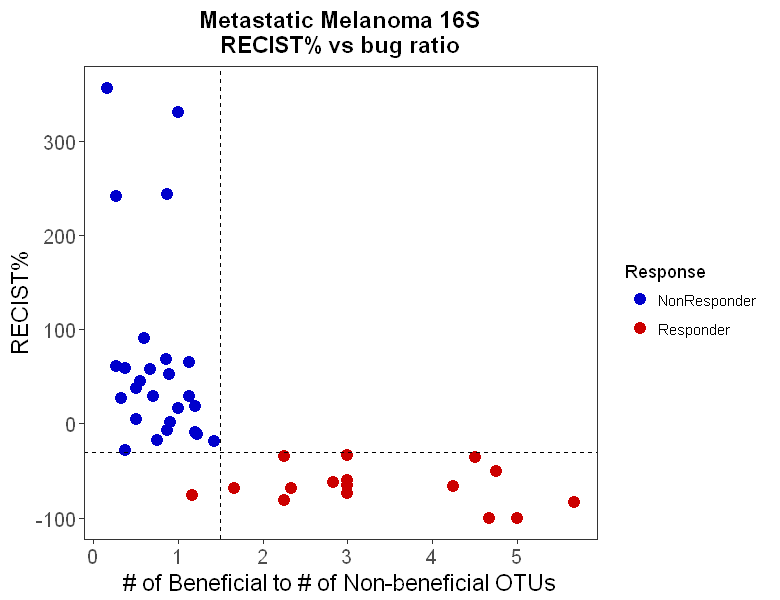

In [5]:
##-- set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 6.5, repr.plot.height = 5)

##-- draw scatter plot; set up color for NR and R groups
data.plot = bug.ratio

plot.colors = c('Responder' = '#CC0000', 'NonResponder' = '#0000CC')
plot.title = 'Metastatic Melanoma 16S\nRECIST% vs bug ratio'
plot.shapes = c('Responder' = 19, 'NonResponder' = 1)
plot.y.break = 1.0

p1 = ggplot(data.plot, aes(bug.ratio, RECIST.)) +
  geom_point(aes(color = Response), size = 3) +
  scale_color_manual(values = plot.colors) +
  ggtitle(plot.title) +
  xlab('# of Beneficial to # of Non-beneficial OTUs') +
  ylab('RECIST%') +
  theme_bw() +
  theme(panel.grid.major.x=element_blank(), panel.grid.major.y = element_blank(), 
        panel.grid.minor=element_blank())  +
  theme(axis.text.y=element_text(size=12), axis.title=element_text(size=14),
        plot.title=element_text(size=14,face='bold',hjust = 0.5), 
        axis.text.x=element_text(size=12), strip.text.x=element_text(size=12,face='bold'), 
        strip.background = element_rect(fill='#CCCCFF'))  +
  geom_hline(yintercept = -30, linetype = 'dashed', color = '#000000',size = 0.5) +
  geom_vline(xintercept = 1.5, 
             linetype = 'dashed', color = '#000000', size = 0.5)  +
  scale_x_continuous(breaks=seq(round(min(data.plot$bug.ratio)),
                                round(max(data.plot$bug.ratio))
                                +0.3,
                                1.0))

print(p1)

In [6]:
sessionInfo()

R version 3.4.2 (2017-09-28)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] reshape2_1.4.2 ggplot2_2.2.1 

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.13     magrittr_1.5     munsell_0.4.3    uuid_0.1-2      
 [5] colorspace_1.3-2 R6_2.2.2         rlang_0.1.4      stringr_1.2.0   
 [9] plyr_1.8.4       tools_3.4.2      grid_3.4.2       gtable_0.2.0    
[13] lazyeval_0.2.1   digest_0.6.12    tibble_1.3.4     crayon_1.3.4    
[17] IRdisplay_0.4.4  repr_0.12.0      IRkernel_0.8.9   evaluate_0.10.1 
[21] labeling_0.3     pbdZMQ_0.2-6     stringi_1.1.5    compiler_3.